# 1.0 - IMPORTS

## 1.1 - LIBRARIES

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
import inflection
import math
from IPython.display import Image
from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle

## 1.2 - LOAD DATA

In [31]:
df_raw = pd.read_csv('../dataset/telecom_customer_churn.csv', low_memory = False)

## 1.3 - HELPER FUNCTIONS

### 1.3.1 - CHECK NAN VOLUMETRY

In [32]:
def na_volumetry(data):

    df_na = pd.DataFrame()
    df_na['attributes'] = data.columns
    df_na['quantity'] = ''
    df_na['percentual'] = ''

    for i in df_na.index:
        df_na.quantity[i]    = data[df_na['attributes'][i]].isna().sum()
        df_na.percentual[i]  = (data[df_na['attributes'][i]].isna().sum()/data['customer_id'].count())*100
    
    return df_na

### 1.3.2 - CHECK OUTLIERS VOLUMETRY

In [33]:
def outliers_volumetry(data):
    
    df_num = pd.DataFrame()
    df_num = data.select_dtypes(exclude = 'object')
    outlier = []

    for i in df_num.columns:
        q1 = np.quantile(df_num[i], 0.25)
        q3 = np.quantile(df_num[i], 0.75)
        interquartile_distance = q3 - q1
        upper_limit = q3 + 1.5 * interquartile_distance
        lower_limit = q1 - 1.5 * interquartile_distance
        outliers = 0
        for j in df_num.index:
            if df_num[i][j] > upper_limit:
                outliers = outliers + 1
            elif df_num[i][j] < lower_limit:
                outliers = outliers + 1
            else:
                pass

        outlier.append(outliers)

    df_outlier = pd.DataFrame()
    df_outlier['attributes']    = df_num.columns
    df_outlier['quantity']      =   outlier
    df_outlier['percentual']    =   (outlier/df_num['age'].count())*100

    return df_outlier         
        


### 1.3.3 - PLOT DIMENTIONS

In [34]:
sns.set(rc = {'figure.figsize':(13,5)})

# 2.0 - DATA CLEANING

Backing up the dataset

In [35]:
df1 = df_raw.copy()

## 2.1 - DATA DIMENTIONS

In [36]:
print('Dataset has {} lines'.format(df1.shape[0]))
print('Dataset has {} columns'.format(df1.shape[1]))
print('\n---------------------------------------------')
print('Quantity of unique features\n')
print(df1.apply(lambda x: x.unique().shape[0]))

Dataset has 7043 lines
Dataset has 38 columns

---------------------------------------------
Quantity of unique features

Customer ID                          7043
Gender                                  2
Age                                    62
Married                                 2
Number of Dependents                   10
City                                 1106
Zip Code                             1626
Latitude                             1626
Longitude                            1625
Number of Referrals                    12
Tenure in Months                       72
Offer                                   6
Phone Service                           2
Avg Monthly Long Distance Charges    3584
Multiple Lines                          3
Internet Service                        2
Internet Type                           4
Avg Monthly GB Download                50
Online Security                         3
Online Backup                           3
Device Protection Plan                

## 2.2 - COLUMNS PATTERNS

In [37]:
#Removing spaces bettween strings
columns = df1.columns
columns_strip = df1.columns.str.strip().str.replace(' ', '')
columns_strip

#Applying snakecase patterns
snakecase = lambda x: inflection.underscore(x)
new_columns = list(map(snakecase, columns_strip))
df1.columns = new_columns

## 2.3 - DATA TYPES

In [38]:
df1.dtypes

customer_id                           object
gender                                object
age                                    int64
married                               object
numberof_dependents                    int64
city                                  object
zip_code                               int64
latitude                             float64
longitude                            float64
numberof_referrals                     int64
tenurein_months                        int64
offer                                 object
phone_service                         object
avg_monthly_long_distance_charges    float64
multiple_lines                        object
internet_service                      object
internet_type                         object
avg_monthly_gb_download              float64
online_security                       object
online_backup                         object
device_protection_plan                object
premium_tech_support                  object
streaming_

## 2.4 - NA VOLUMETRY

### 2.4.1 - TOTAL NA

In [39]:
df1.isna().sum()

customer_id                             0
gender                                  0
age                                     0
married                                 0
numberof_dependents                     0
city                                    0
zip_code                                0
latitude                                0
longitude                               0
numberof_referrals                      0
tenurein_months                         0
offer                                3877
phone_service                           0
avg_monthly_long_distance_charges     682
multiple_lines                        682
internet_service                        0
internet_type                        1526
avg_monthly_gb_download              1526
online_security                      1526
online_backup                        1526
device_protection_plan               1526
premium_tech_support                 1526
streaming_tv                         1526
streaming_movies                  

### 2.4.2 - PERCENTUAL BASE

In [40]:
na_volumetry(df1)

,attributes,quantity,percentual
0,customer_id,0,0.0
1,gender,0,0.0
2,age,0,0.0
3,married,0,0.0
4,numberof_dependents,0,0.0
5,city,0,0.0
6,zip_code,0,0.0
7,latitude,0,0.0
8,longitude,0,0.0
9,numberof_referrals,0,0.0


In this case, we can observe that there is a very large volume of missing data in our dataset, over 73% in some columns, but 9% and 21% in others. For the rows with lower NA we can devise a strategy to handle them properly. However, we will delete the data with 70% missing from our database.

### 2.4.3 - HANDLING DATA NAN

In [41]:
# Using lambda function for fill all NAN data with the data that most repeated 
df1['avg_monthly_long_distance_charges'] = df1['avg_monthly_long_distance_charges'].apply(lambda x: 18.26 if math.isnan(x) else (x))

# Using fillna function for fill all NAN data with the data that most repeated 
df1['multiple_lines']           = df1['multiple_lines'].fillna('No')
df1['internet_type']            = df1['internet_type'].fillna('Fiber Optic')
df1['avg_monthly_gb_download']  = df1['avg_monthly_gb_download'].fillna(19.0)
df1['online_security']          = df1['online_security'].fillna('No')
df1['online_backup']            = df1['online_backup'].fillna('No')
df1['device_protection_plan']   = df1['device_protection_plan'].fillna('No')
df1['premium_tech_support']     = df1['premium_tech_support'].fillna('No')
df1['streaming_tv']             = df1['streaming_tv'].fillna('No')
df1['streaming_movies']         = df1['streaming_movies'].fillna('No')
df1['streaming_music']          = df1['streaming_music'].fillna('No')
df1['unlimited_data']           = df1['unlimited_data'].fillna('Yes')

# Drop the columns that have 73% of NA data
df1.drop(['churn_category', 'churn_reason'], axis = 1, inplace = True)

df1.isna().sum()

customer_id                             0
gender                                  0
age                                     0
married                                 0
numberof_dependents                     0
city                                    0
zip_code                                0
latitude                                0
longitude                               0
numberof_referrals                      0
tenurein_months                         0
offer                                3877
phone_service                           0
avg_monthly_long_distance_charges       0
multiple_lines                          0
internet_service                        0
internet_type                           0
avg_monthly_gb_download                 0
online_security                         0
online_backup                           0
device_protection_plan                  0
premium_tech_support                    0
streaming_tv                            0
streaming_movies                  

## 2.5 - OUTLIERS VOLUMETRY

In [42]:
# Tracking the dataset to obtain integer and float features
df_numerical = df1.select_dtypes(exclude = 'object')
df_numerical

,age,numberof_dependents,zip_code,latitude,longitude,numberof_referrals,tenurein_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
0,37,0,93225,34.827662,-118.999073,2,9,42.39,16.0,65.60,593.30,0.00,0,381.51,974.81
1,46,0,91206,34.162515,-118.203869,0,9,10.69,10.0,-4.00,542.40,38.33,10,96.21,610.28
2,50,0,92627,33.645672,-117.922613,0,4,33.65,30.0,73.90,280.85,0.00,0,134.60,415.45
3,78,0,94553,38.014457,-122.115432,1,13,27.82,4.0,98.00,1237.85,0.00,0,361.66,1599.51
4,75,0,93010,34.227846,-119.079903,3,3,7.38,11.0,83.90,267.40,0.00,0,22.14,289.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,20,0,91941,32.759327,-116.997260,0,13,46.68,59.0,55.15,742.90,0.00,0,606.84,1349.74
7039,40,0,95367,37.734971,-120.954271,1,22,16.20,17.0,85.10,1873.70,0.00,0,356.40,2230.10
7040,22,0,95432,39.108252,-123.645121,0,2,18.62,51.0,50.30,92.75,0.00,0,37.24,129.99
7041,21,0,92075,33.001813,-117.263628,5,67,2.12,58.0,67.85,4627.65,0.00,0,142.04,4769.69


Now let's visualize through a boxplot in a panel which attributes are an outlier

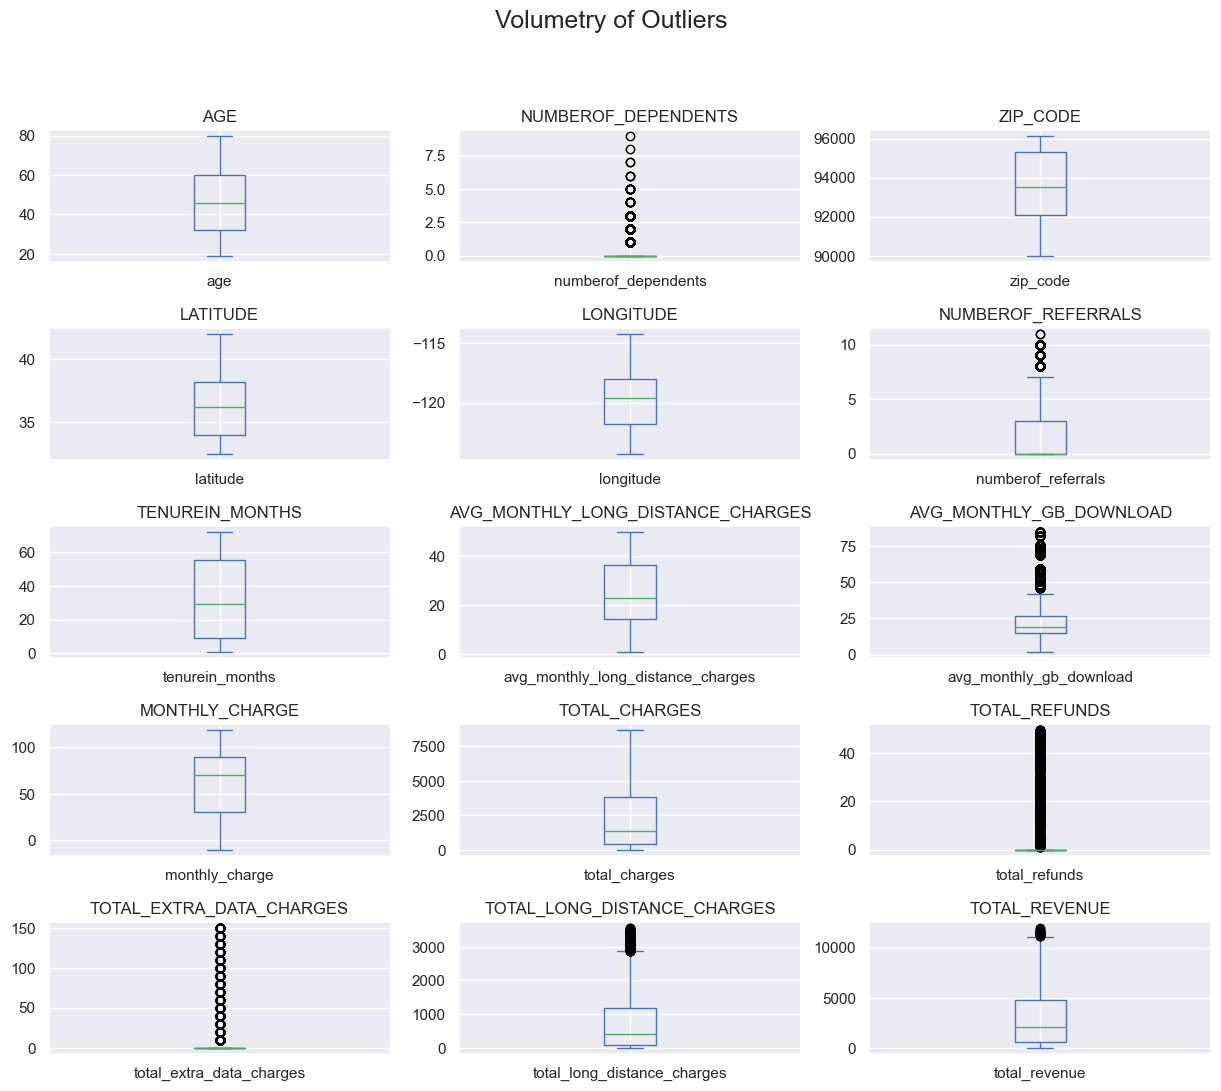

In [43]:
# Creating the subplots for the dashbord of the boxplot

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Volumetry of Outliers", fontsize=18)

# loop through the length of pointer and keep track of index
for n, pointer in enumerate(df_numerical.columns):
    
    # add a new subplot iteratively
    ax = plt.subplot(5, 3, n + 1)

    # create a boxplot for the pointer on the new subplot axis
    df_numerical[pointer].plot(kind='box', ax=ax)

    # chart formatting
    ax.set_title(pointer.upper())
    ax.set_xlabel("")

plt.show()

below we know how many outliers represent in the data set


In [44]:
# Applying the function to calculate the volumetry of dataset outliers
outliers_volumetry(df_numerical)

,attributes,quantity,percentual
0,age,0,0.000000
1,numberof_dependents,1627,23.100951
2,zip_code,0,0.000000
3,latitude,0,0.000000
4,longitude,0,0.000000
5,numberof_referrals,676,9.598183
6,tenurein_months,0,0.000000
7,avg_monthly_long_distance_charges,0,0.000000
8,avg_monthly_gb_download,1089,15.462161
9,monthly_charge,0,0.000000


After evaluating how much these outliers represent in the dataset, we can determine on a case-by-case basis to determine how we will handle:

- number of dependents: Indicates 23% of outliers in the base for this characteristic, but we can maintain this because, in addition to being a low rate, this may be a cancellation factor that reflects on a characteristic that may impact a future analysis;

- number of references: Indicates 9% of outliers in the base for this feature, but in addition to the low volume, it is a feature that would not affect the performance of a machine learning model or an insight;

- avg monthly gb download: Indicates 15% of outliers in the base for this functionality, however we can also keep this data because it is not something outside the normal terms a percentage of customers that can make a greater use than the use of other customers, varies from customer to customer need;

- total refunds: Indicates 7% of outliers in the base for these characteristics, which represents a very low volume. We can consider normal behavior, which can positively influence insights and future analysis;

- total extra data charge: Indicates 10% of outliers in the base for this characteristic, we will consider taking into account the low volume and that can also represent an insight and plausible factors to define a churn;

- total long distance charges: Indicates only 2% outliers on the basis for this feature, which we can take into account as well as the motivation for use as an average monthly gb download feature;

- total revenue: Indicates only 0.2% of outliers in the base for this characteristic, so we will keep it, as it may reflect an insight.

# 3.0 - STATICTICAL DESCRIPTIVE

Backing up the dataset

In [45]:
df2 = df1.copy()

Tracking the dataset into numerical and categorical features:


In [46]:
df2_num = pd.DataFrame()
df2_cat = pd.DataFrame()

df2_num = df2.select_dtypes(exclude = 'object')
df2_cat = df2.select_dtypes(include = 'object')

## 3.1 - NUMERICAL ATTRIBUTES

In [47]:
# Tendence central:
# - Mean
# - Median

central_tendence1 = pd.DataFrame(df2_num.apply(lambda x: np.mean(x))).T
central_tendence2 = pd.DataFrame(df2_num.apply(lambda x: np.median(x))).T

# Dispersion:
# - Max
# - Min
# - Range
# - Standart Deviation
# - Skew
# - Kurtosis

dispersion1 = pd.DataFrame(df2_num.apply(lambda x: np.std(x))).T
dispersion2 = pd.DataFrame(df2_num.apply(min)).T
dispersion3 = pd.DataFrame(df2_num.apply(max)).T
dispersion4 = pd.DataFrame(df2_num.apply(lambda x: x.min() - x.max())).T
dispersion5 = pd.DataFrame(df2_num.apply(lambda x: x.skew())).T
dispersion6 = pd.DataFrame(df2_num.apply(lambda x: x.kurtosis())).T

# Concatenating the dataframes

metrics = pd.concat([central_tendence1, central_tendence2, dispersion1, dispersion2, dispersion3, dispersion4, dispersion5, dispersion6]).T.reset_index()
metrics.columns = ['attribuites', 'mean', 'median', 'standart deviation', 'min', 'max', 'range', 'skew', 'kurtosis']
metrics

,attribuites,mean,median,standart deviation,min,max,range,skew,kurtosis
0,age,46.509726,46.000000,16.749162,19.000000,80.000000,-61.000000,0.162186,-1.002849
1,numberof_dependents,0.468692,0.000000,0.962734,0.000000,9.000000,-9.000000,2.109932,4.446358
2,zip_code,93486.070567,93518.000000,1856.635684,90001.000000,96150.000000,-6149.000000,-0.209615,-1.173915
3,latitude,36.197455,36.205465,2.468753,32.555828,41.962127,-9.406299,0.314804,-1.160506
4,longitude,-119.756684,-119.595293,2.154272,-124.301372,-114.192901,-10.108471,-0.091932,-1.191291
5,numberof_referrals,1.951867,0.000000,3.000986,0.000000,11.000000,-11.000000,1.446060,0.721964
6,tenurein_months,32.386767,29.000000,24.540319,1.000000,72.000000,-71.000000,0.240543,-1.387052
7,avg_monthly_long_distance_charges,24.727138,22.890000,13.659414,1.010000,49.990000,-48.980000,0.136497,-1.088345
8,avg_monthly_gb_download,24.632117,19.000000,17.584997,2.000000,85.000000,-83.000000,1.532925,1.885242
9,monthly_charge,63.596131,70.050000,31.202528,-10.000000,118.750000,-128.750000,-0.275394,-1.125790


# 4.0 - FEATURE ENGINEERING

## 4.1 - MIND MAP OF HYPOTESES

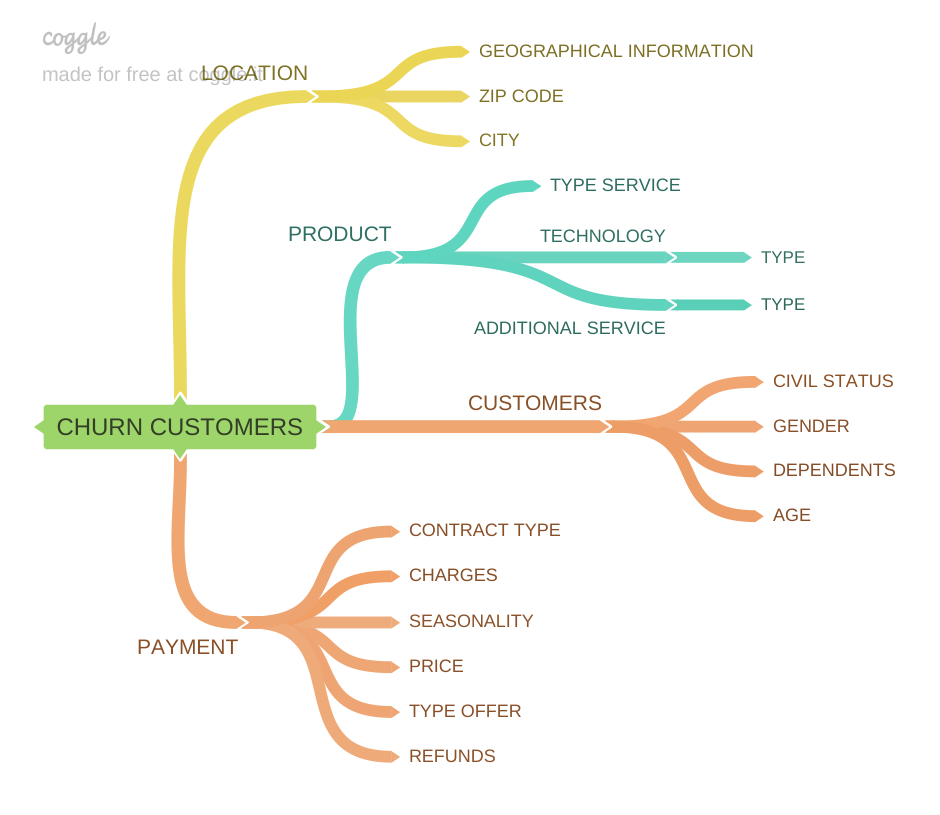

In [48]:
Image('../img/mindmap.png')

1. Customers with cable Internet tend to churn more and Optic Fiber Internet, and what is the correlation with who have the internet service?
2. Customers who have Phone services tend to churn less, and what is the correlation with multiple lines?
3. Customers with streaming services tend to churn less.
4. Customers with an unlimited data plan tend to churn less.
5. Customers with dependents tend to churn less.
6. Married customers tend to churn less than single.
7. Older customers tend to churn less than younger
8. Customers with longer contracts tend to churn less.
9. Mailed Check customers tend to churn more than credit card customers.
10. Customers who don't receive paper invoices tend to churn more.
11. Male customers tend to churn more than female.
12. The type of offer to the customer influences the cancellation.

## 4.2 - BRANCH FEATURES

Backing up the dataset

In [49]:
df3 = df2.copy()

In the 'customer_status' column, we have 3 types of features (Stayed, Joined, Chuned). We will improve these features and separate them into Churn: 'Yes' or 'No'

In [50]:
df3.rename({'customer_status': 'churn'}, axis=1, inplace = True)
df3['churn'] = df3['churn'].apply(lambda x: '1' if x == 'Churned' else '0')
df3['churn'] = pd.to_numeric(df3['churn'])

Let's make a change in the 'number_of_depentes' column for a categorical feature. Changing to 'Yes' and 'No' if the customer has more than 1 dependent. This adjustment will help in the construction stage of the Machine Leaning model for creating Dummies variables

In [51]:
df3.rename(columns = {'numberof_dependents' : 'dependents'}, inplace = True)
df3['dependents'] = df3['dependents'].astype(str)
df3['dependents'] = df3['dependents'].apply(lambda x: 'No' if x == '0' else 'Yes')


The 'monthly_charge' column has negative data, so we'll replace it with 0

In [52]:
df3['monthly_charge'] = df3['monthly_charge'].apply(lambda x: 0 if x <= 0 else x)

We're going to track customers based on the services they subscribe to in a new feature called 'product_type'. Thus, we can determine whether the amount of added services can affect customer behavior.

In [53]:
df3['product_type'] = 'internet and phone'

df3.loc[(df3['internet_service'] == 'Yes') & (df3['phone_service'] == 'No'), 'product_type'] = 'only internet'
df3.loc[(df3['internet_service'] == 'No') & (df3['phone_service'] == 'Yes'), 'product_type'] = 'only phone'

We are going to track customers based on the contracted services in a new feature called 'customer_type'. Thus, we can determine whether the amount of aggregated services can affect customer behavior.

In [54]:
df3['customer_type'] = 'standart'

df3.loc[(df3['online_security'] == 'Yes') & (df3['online_backup'] == 'Yes') 
        & (df3['device_protection_plan'] == 'Yes') & (df3['streaming_tv'] == 'Yes') 
        & (df3['streaming_movies'] == 'Yes') & (df3['streaming_music'] == 'Yes')
        & (df3['unlimited_data'] == 'Yes'), 'customer_type'] = 'premium'

df3.loc[(df3['online_security'] == 'No') & (df3['online_backup'] == 'No') 
        & (df3['device_protection_plan'] == 'No') & (df3['streaming_tv'] == 'Yes') 
        & (df3['streaming_movies'] == 'Yes') & (df3['streaming_music'] == 'Yes')
        & (df3['unlimited_data'] == 'No'), 'customer_type'] = 'only streaming'

df3.loc[(df3['online_security'] == 'Yes') & (df3['online_backup'] == 'Yes') 
        & (df3['device_protection_plan'] == 'Yes') & (df3['streaming_tv'] == 'No') 
        & (df3['streaming_movies'] == 'No') & (df3['streaming_music'] == 'No')
        & (df3['unlimited_data'] == 'Yes'), 'customer_type'] = 'only data service'



# 5.0 - EXPLORATORY DATA ANALYSIS (EDA)

Backing up the dataset

In [55]:
df4 = df3.copy()

## 5.1 - UNIVARIATE ANALYSIS

### 5.1.1 - RESPONSE VARIABLE

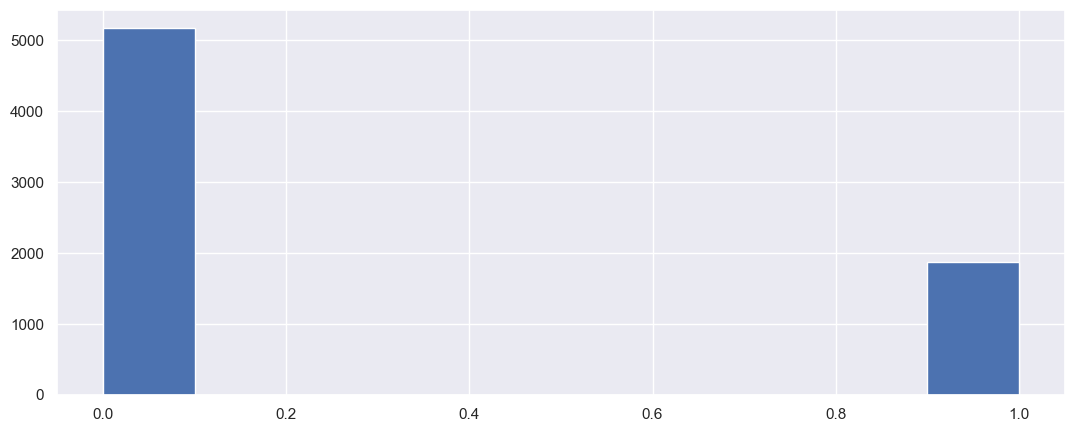

In [56]:
plt.hist(df4['churn'])
plt.show()

### 5.1.2 - NUMERICAL VARIABLE

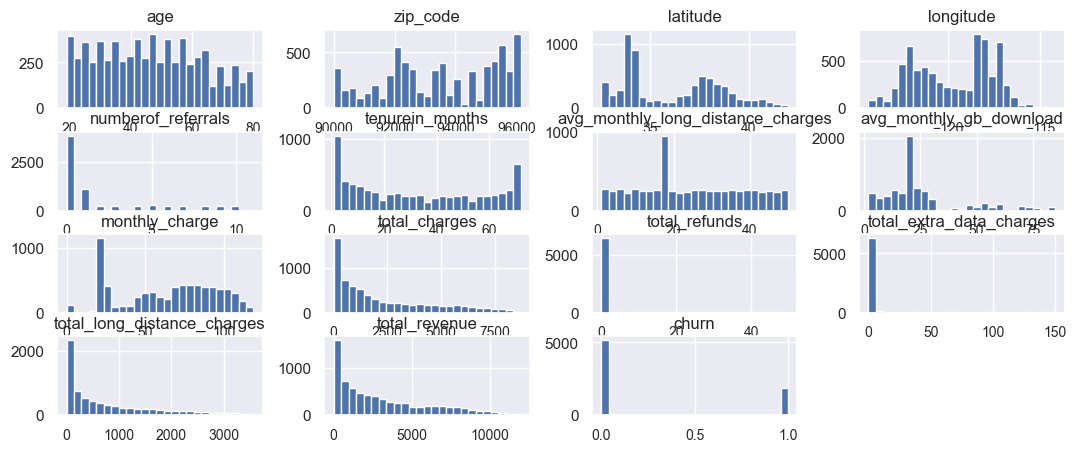

In [57]:
num_variable = df4.select_dtypes(exclude = 'object')
num_variable.hist(bins=25, xlabelsize=10)
plt.show()

## 5.2 - BIVARIATE ANALYSIS

### 1. Customers who have internet service tend to churn less and, cable Internet tend to churn more than Optic Fiber.

We can proportionally observe customers who do not have internet service tend to have a lower contract cancellation rate than customers who have internet service.
Even though the customer base has more fiber optic customers, we have a cancellation rate for this technology than for analogue.
We can define that our hypothesis was refuted.

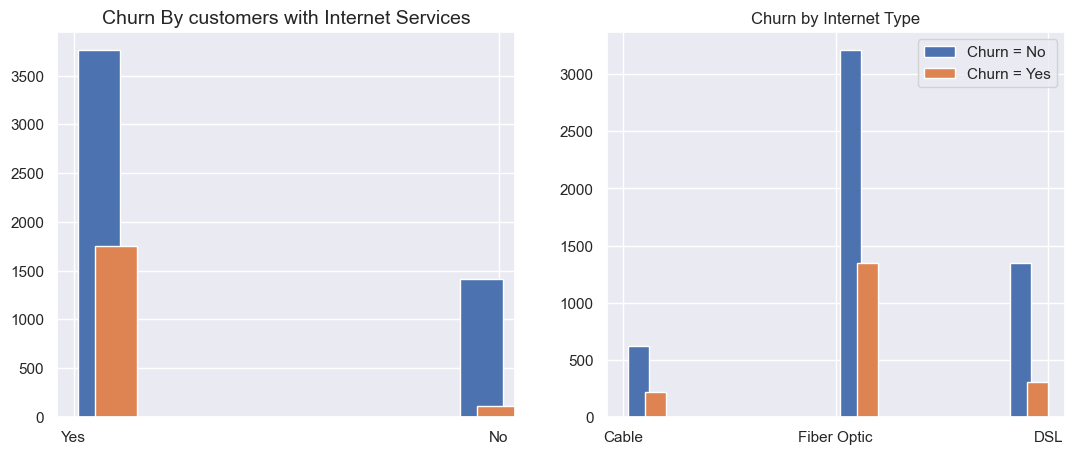

In [58]:
plt.subplot(1,2,1)
aux0 = df4[df4['churn'] == 0]['internet_service']
aux1 = df4[df4['churn'] == 1]['internet_service']
plt.hist([aux0,aux1], label=['Churn = No', 'Churn = Yes'], width=0.1)
plt.title('Churn By customers with Internet Services', size=14)

plt.subplot(1,2,2)
aux3 = df4[df4['churn'] == 0]['internet_type']
aux4 = df4[df4['churn'] == 1]['internet_type']
plt.hist([aux3, aux4], label=['Churn = No', 'Churn = Yes'], width=0.1)
plt.title('Churn by Internet Type')

plt.legend()
plt.show()

### 2. Customers who have Phone services tend to churn less, and what is the correlation with multiple lines?

Customers with telephone service tend to have a similar cancellation rate to those who do not have the service, but we have more customers with a higher telephone service than customers who do not have the service contracted. We can also observe that for customers with multiple lines, the cancellation rate is higher.

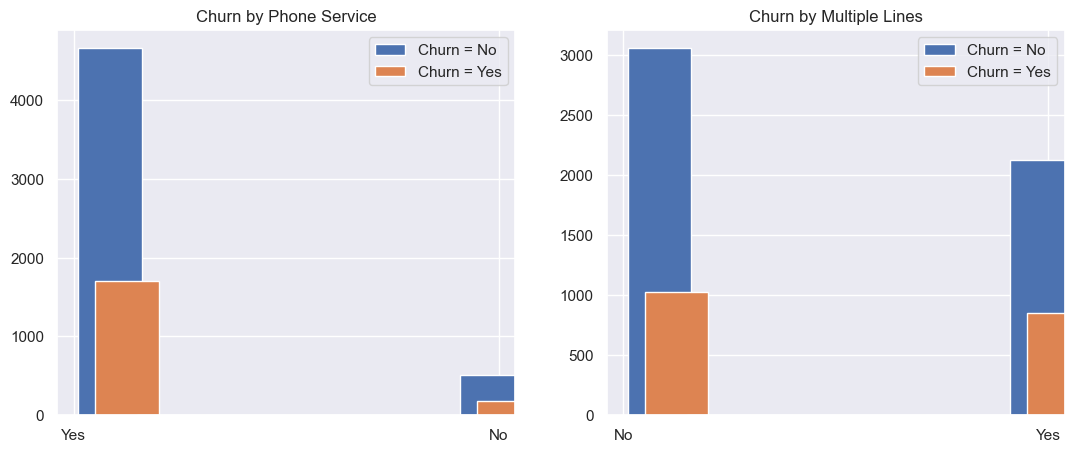

In [59]:
plt.subplot(1,2,1)
aux0 = df4[df4['churn'] == 0]['phone_service']
aux1 = df4[df4['churn'] == 1]['phone_service']
plt.hist([aux0, aux1], label=['Churn = No', 'Churn = Yes'], width=0.15)
plt.title('Churn by Phone Service')
plt.legend()

plt.subplot(1,2,2)
aux2 = df4[df4['churn'] == 0]['multiple_lines']
aux3 = df4[df4['churn'] == 1]['multiple_lines']
plt.hist([aux2, aux3], label=['Churn = No', 'Churn = Yes'], width=0.15)
plt.title('Churn by Multiple Lines')
plt.legend()
plt.show()

### 3. Customers with streaming services tend to Churn less.

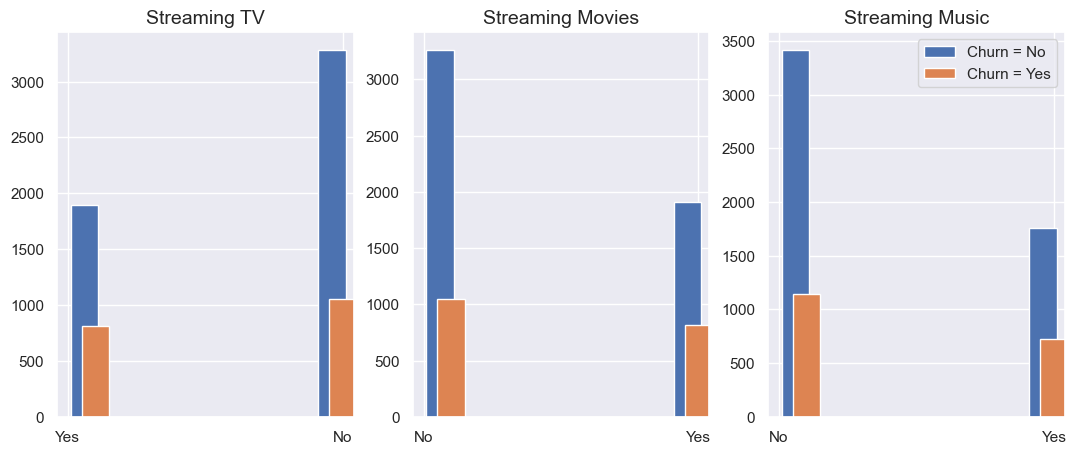

In [60]:
plt.subplot(1,3,1)
aux0 = df4[df4['churn'] == 0]['streaming_tv']
aux1 = df4[df4['churn'] == 1]['streaming_tv']
plt.hist([aux0, aux1], label=['Churn = No', 'Churn = Yes'], width=0.1)
plt.title('Streaming TV', size=14)

plt.subplot(1,3,2)
aux02 = df4[df4['churn'] == 0]['streaming_movies']
aux03 = df4[df4['churn'] == 1]['streaming_movies']
plt.hist([aux02, aux03], label=['Churn = No', 'Churn = Yes'], width=0.1)
plt.title('Streaming Movies', size=14)

plt.subplot(1,3,3)
aux04 = df4[df4['churn'] == 0]['streaming_music']
aux05 = df4[df4['churn'] == 1]['streaming_music']
plt.hist([aux04, aux05], label=['Churn = No', 'Churn = Yes'], width=0.1)
plt.title('Streaming Music', size=14)

plt.legend()
plt.show()


### 4. Customers with an unlimited data plan tend to churn less.

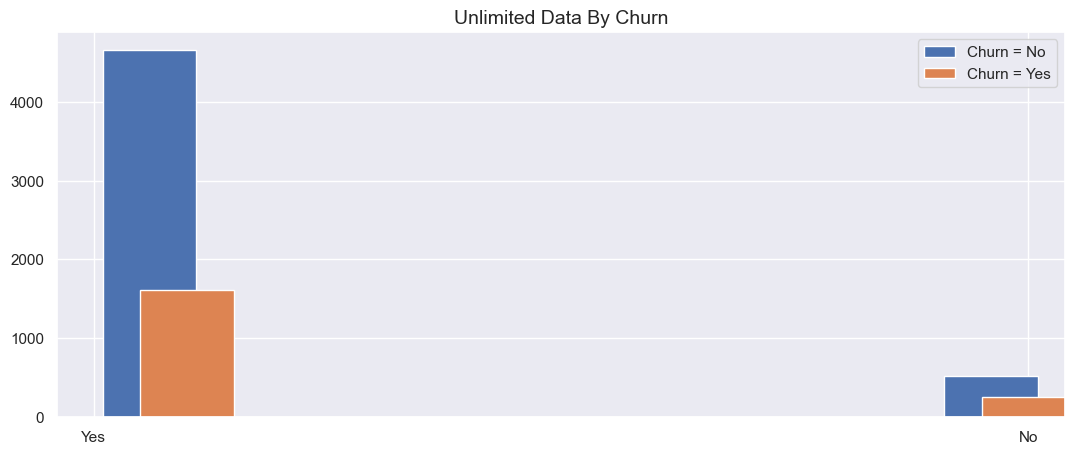

In [61]:
aux = df4[df4['churn'] == 0]['unlimited_data']
aux1 = df4[df4['churn'] == 1]['unlimited_data']
plt.hist([aux, aux1], label = ['Churn = No', 'Churn = Yes'], width=0.1)   
plt.title('Unlimited Data By Churn', size=14)
plt.legend()
plt.show()

### 5. Customers with dependents tend to churn less

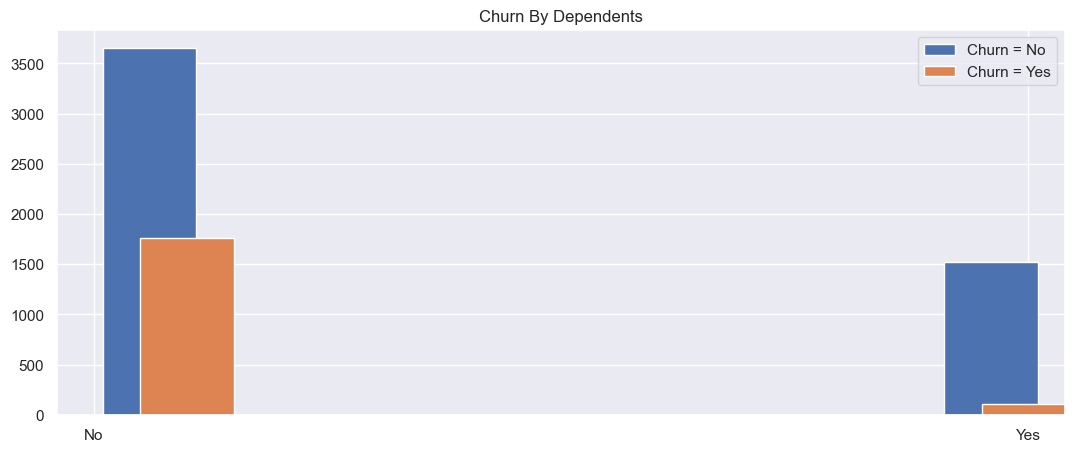

In [62]:
aux0 = df4[df4['churn'] == 0]['dependents']
aux1 = df4[df4['churn'] == 1]['dependents']
plt.hist([aux0, aux1], label=['Churn = No', 'Churn = Yes'], width=0.1)
plt.title('Churn By Dependents')
plt.legend()
plt.show()

### 6. Married customers tend to churn less than singles.

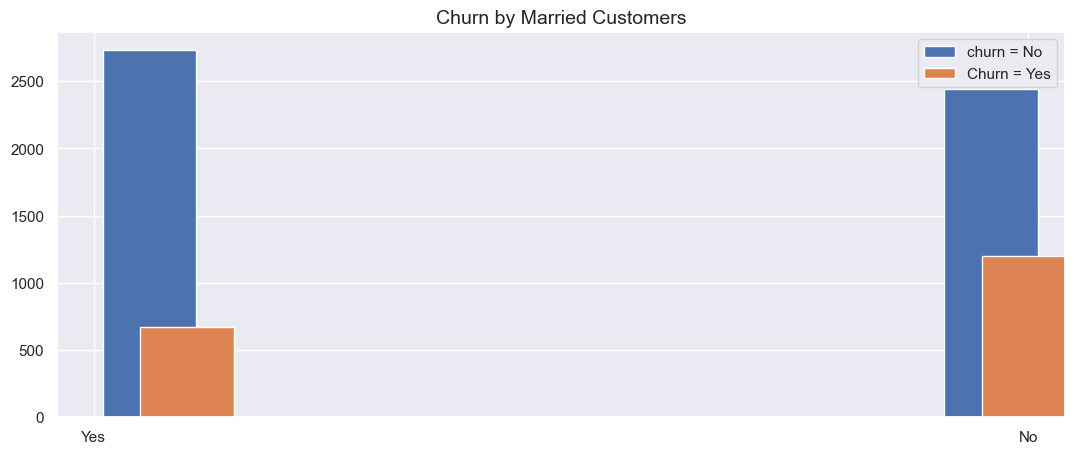

In [63]:
aux = df4[df4['churn'] == 0]['married']
aux1 = df4[df4['churn'] == 1]['married']
plt.hist([aux, aux1], label=['churn = No', 'Churn = Yes'], width=0.1)
plt.title('Churn by Married Customers', size=14)
plt.legend()
plt.show()

### 7. Older customers tend to churn less than younger customers.

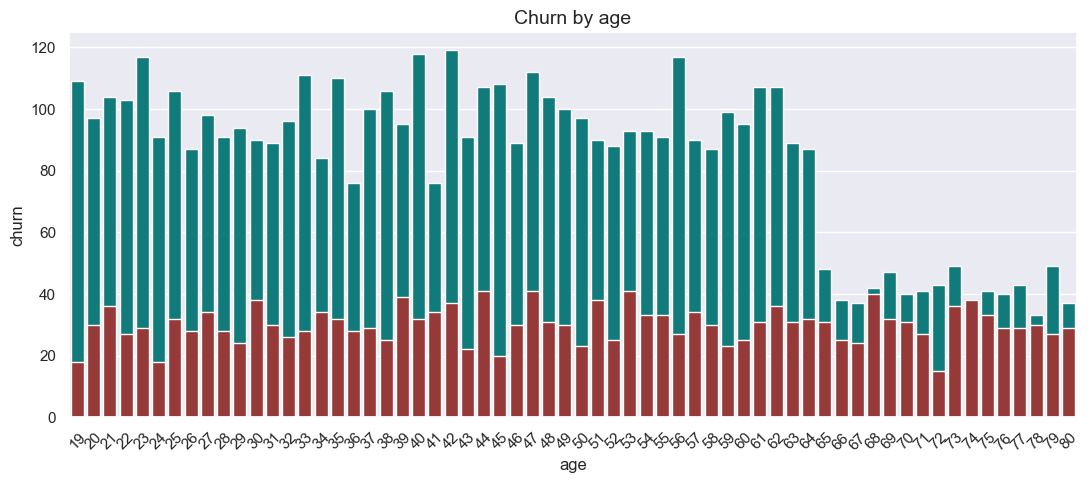

In [64]:
aux0= df4.loc[df4['churn'] == 0]

aux1 = aux0[['age', 'churn']].groupby('age').count().reset_index()
sns.barplot(data = aux1, x='age', y='churn', color='#008B8B')
plt.xticks(rotation = 45)


aux2= df4.loc[df4['churn'] == 1]
aux3 = aux2[['age', 'churn']].groupby('age').count().reset_index()
sns.barplot(data = aux3, x='age', y='churn', color='#A52A2A')


plt.title('Churn by age', size=14)
plt.xticks(rotation = 45)
plt.show()

### 8. Customers with longer contracts tend to churn less

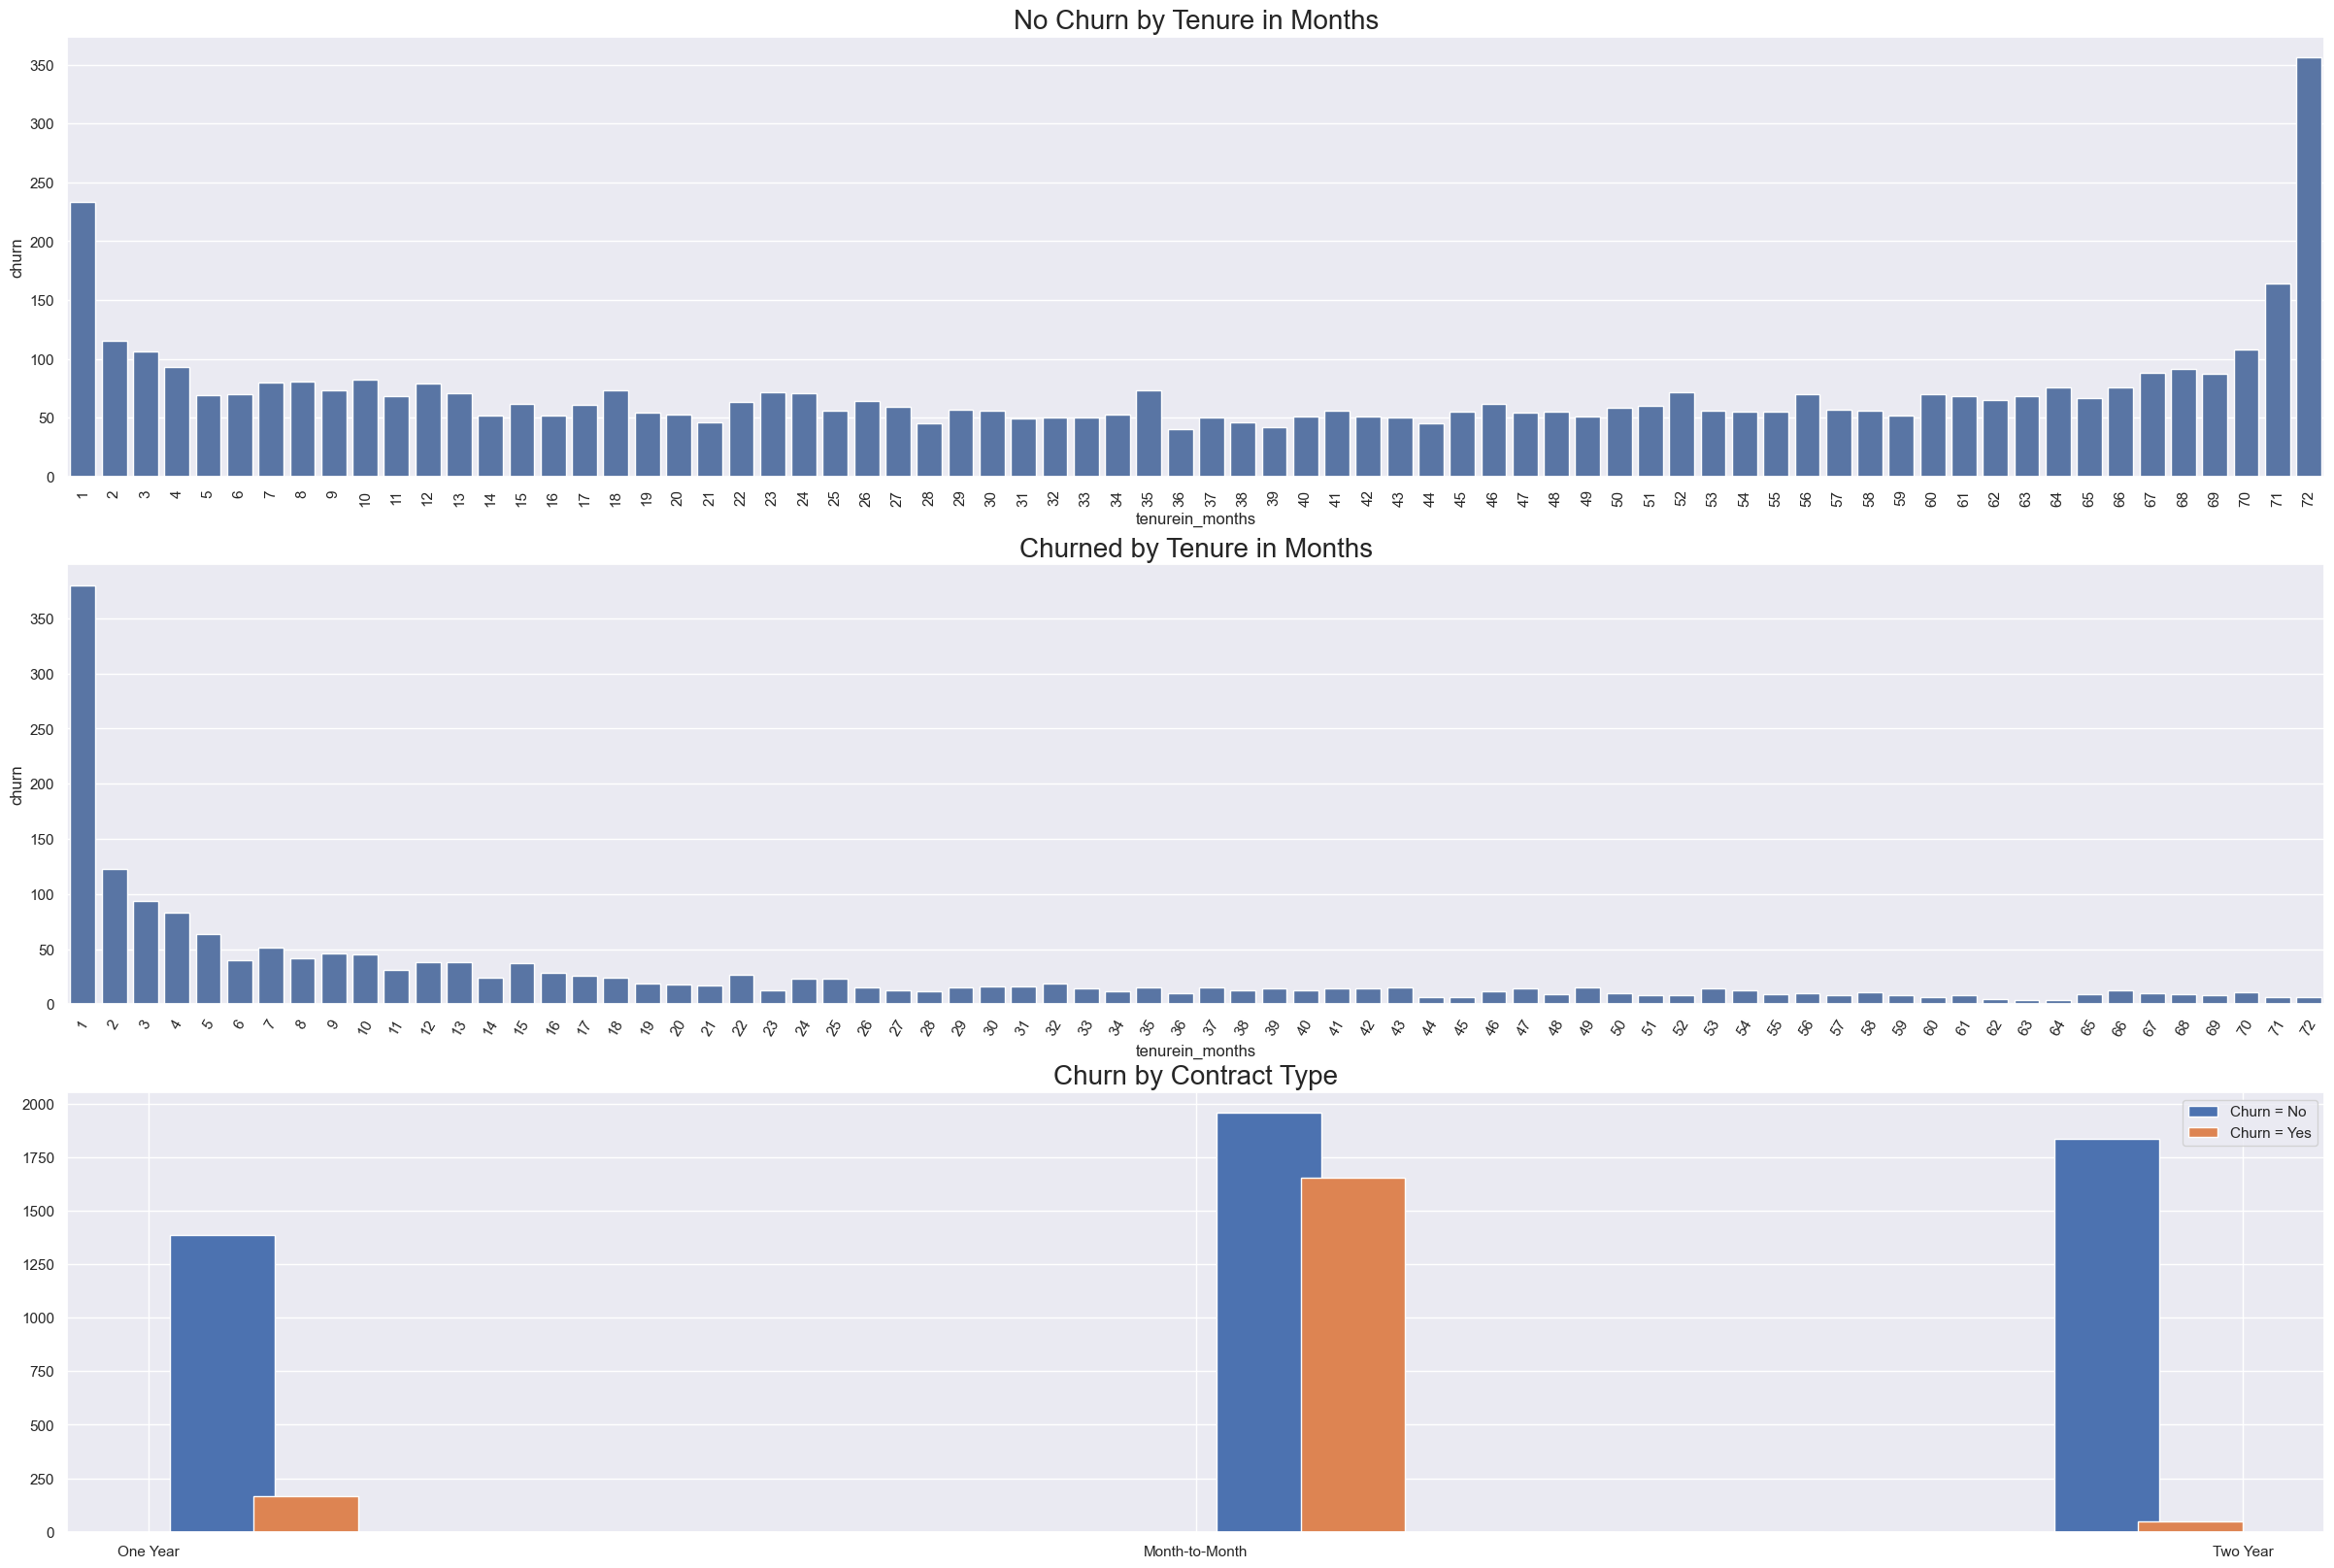

In [65]:
plt.figure(figsize=(30,20))

plt.subplot(3,1,1)

aux2 = df4[df4['churn'] == 0]
aux3 =aux2[['churn', 'tenurein_months']].groupby('tenurein_months').count().reset_index()
sns.barplot(data = aux3, x = 'tenurein_months', y = 'churn')
plt.title('No Churn by Tenure in Months', size=20)
plt.xticks(rotation = 90)

plt.subplot(3,1,2)
aux4 = df4[df4['churn'] == 1]
aux5 = aux4[['churn', 'tenurein_months']].groupby('tenurein_months').count().reset_index()
sns.barplot(data = aux5, x = 'tenurein_months', y = 'churn')
plt.title('Churned by Tenure in Months', size=20)
plt.xticks(rotation = 60)

plt.subplot(3,1,3)
aux0 = df4[df4['churn'] == 0]['contract']
aux1 = df4[df4['churn'] == 1]['contract']
plt.hist([aux0, aux1], label=['Churn = No', 'Churn = Yes'], width = 0.1)
plt.title('Churn by Contract Type', size=20)
plt.legend()

plt.show()

### 9. Mailed Check customers tend to churn more than credit card customers

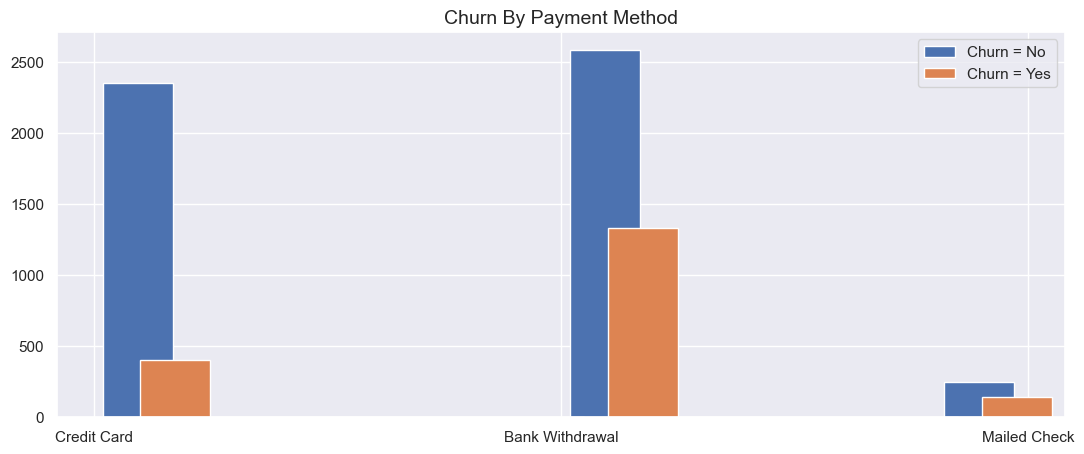

In [66]:
aux0 = df4[df4['churn'] == 0]['payment_method']
aux1 = df4[df4['churn'] == 1]['payment_method']
plt.hist([aux0, aux1], label=['Churn = No', 'Churn = Yes'], width=0.15)
plt.title('Churn By Payment Method', size=14)
plt.legend()
plt.show()

### 10. Male customers tend to churn more than female.

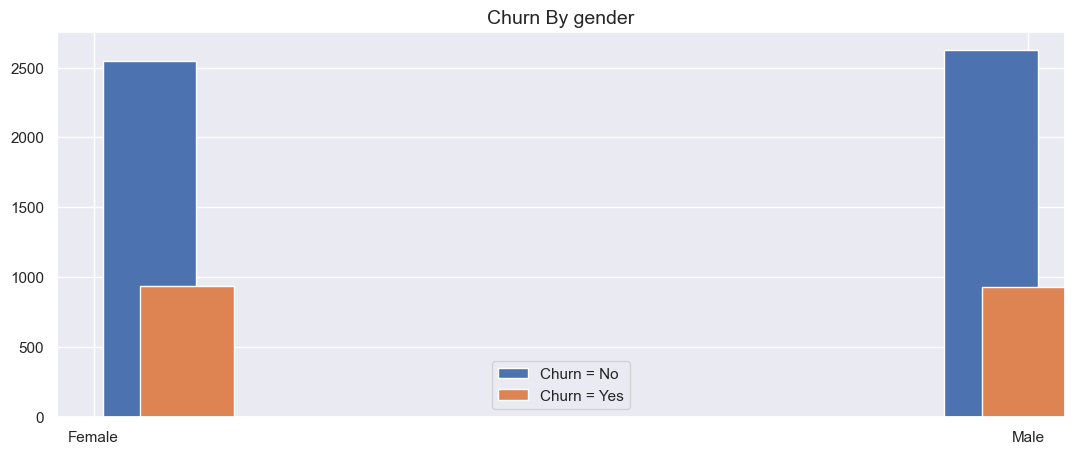

In [67]:
aux0 = df4[df4['churn'] == 0]['gender']
aux1 = df4[df4['churn'] == 1]['gender']
plt.hist([aux0, aux1], label=['Churn = No', 'Churn = Yes'], width=0.10)
plt.title('Churn By gender', size=14)
plt.legend()
plt.show()

### 11. Rate of Churn by Offer

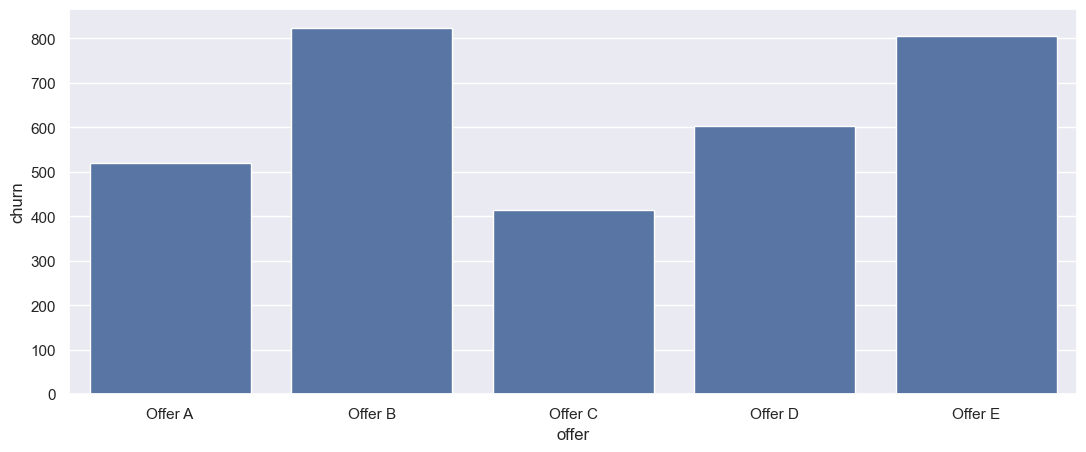

In [68]:
aux = df4[['offer','churn']].groupby('offer').count().reset_index()
sns.barplot(data = aux, x = 'offer', y = 'churn')
plt.show()

## 5.3 - MULTIVARIATE ANALYSIS

### 1. We will do a check to determine the correlation between the type of internet and the number of dependents.<br>
We can observe that regardless of the technology for the internet product, the cancellation rate is approximately 2/3 higher for those who do not have dependents.

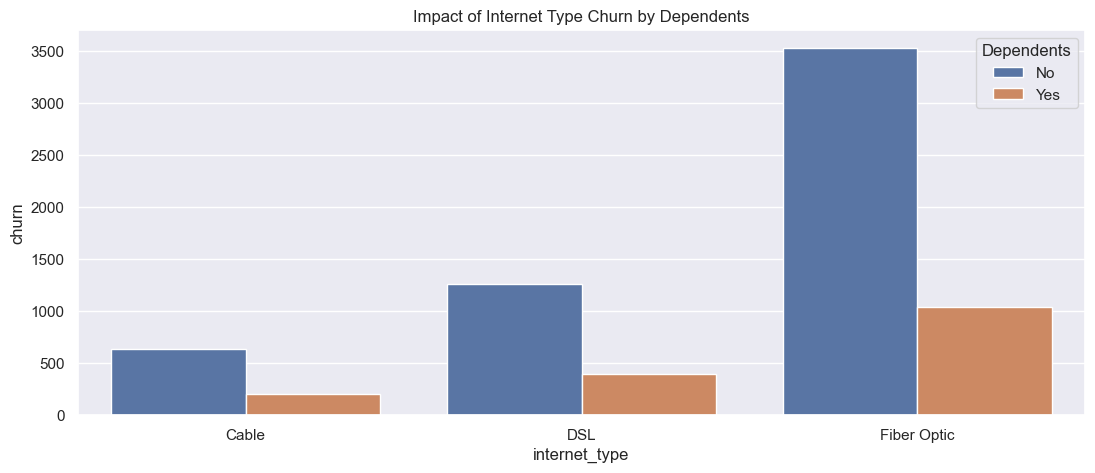

In [69]:
aux0 = df4.groupby(['internet_type', 'dependents'])['churn'].count().reset_index()
sns.barplot(data = aux0, x = 'internet_type', y = 'churn', hue='dependents')
plt.title('Impact of Internet Type Churn by Dependents')
plt.legend(title = 'Dependents')
plt.show()

### 2. Also observing the rate of cancellation of Customers by dependents, who have the telephone product and multiple lines, is much higher for both when the customer does not have dependents.

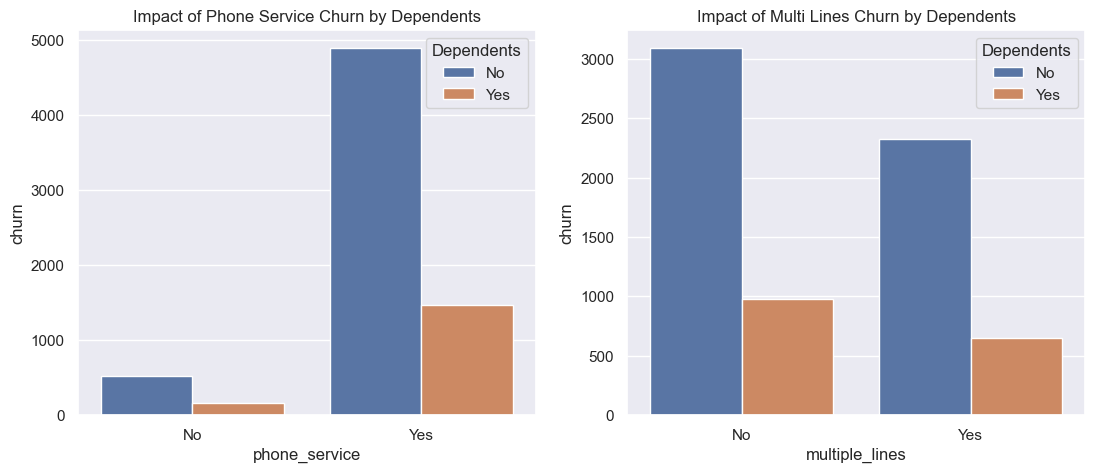

In [70]:
plt.subplot(1,2,1)
aux1 = df4.groupby(['phone_service', 'dependents'])['churn'].count().reset_index()
sns.barplot(data = aux1, y = 'churn', x = 'phone_service', hue='dependents')
plt.title('Impact of Phone Service Churn by Dependents')
plt.legend(title = 'Dependents')

plt.subplot(1,2,2)
aux2 = df4.groupby(['multiple_lines', 'dependents'])['churn'].count().reset_index()
sns.barplot(data = aux2, x = 'multiple_lines', y = 'churn', hue = 'dependents')
plt.title('Impact of Multi Lines Churn by Dependents')
plt.legend(title = 'Dependents')
plt.show()

# 6.0 - DATA PREPARATION

Backing up the dataset

In [71]:
df5 = df4.copy()

Dropping features that won't be useful

In [72]:
df5.drop(columns = ['city', 'zip_code', 'longitude', 'latitude'], axis = 1, inplace = True)

## 6.2 - TRANSFORMATION

In [73]:

df5['dependents'] = df5['dependents'].apply(lambda x: 0 if x == 'No' else 1)
df5['internet_service'] = df5['internet_service'].apply(lambda x: 0 if x == 'No' else 1)
df5['phone_service'] = df5['phone_service'].apply(lambda x: 0 if x == 'No' else 1)
df5['multiple_lines'] = df5['multiple_lines'].apply(lambda x: 0 if x == 'No' else 1)


One Hot Enconding

In [74]:
df5.columns

Index(['customer_id', 'gender', 'age', 'married', 'dependents',
       'numberof_referrals', 'tenurein_months', 'offer', 'phone_service',
       'avg_monthly_long_distance_charges', 'multiple_lines',
       'internet_service', 'internet_type', 'avg_monthly_gb_download',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'churn', 'product_type', 'customer_type'],
      dtype='object')

In [75]:
df5 = pd.get_dummies(df5, columns = ['gender', 'married', 'online_security', 'online_backup', 'device_protection_plan', 'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music', 'unlimited_data', 'paperless_billing'])

Ordinal Enconding

In [76]:
internet_type_dict = {'Cable': 1, 'DSL': 2, 'Fiber Optic': 3}
df5['internet_type'] = df5['internet_type'].map(internet_type_dict)

contract_dict = {'Month-to-Month': 1, 'One Year': 2, 'Two Year': 3}
df5['contract'] = df5['contract'].map(contract_dict)

Label Encondig

In [77]:
le = LabelEncoder()
df5['offer']          = le.fit_transform(df5['offer'])
df5['payment_method'] = le.fit_transform(df5['payment_method'])
df5['product_type']   = le.fit_transform(df5['product_type'])
df5['customer_type']  = le.fit_transform(df5['customer_type'])

MinMaxScaler

In [78]:
mms = MinMaxScaler()
df5[['tenurein_months', 'avg_monthly_long_distance_charges', 'monthly_charge', 'total_charges']] = mms.fit_transform(
    df5[['tenurein_months', 'avg_monthly_long_distance_charges', 'monthly_charge', 'total_charges']])

RobustScaler

In [79]:
rs = RobustScaler()
df5[['numberof_referrals', 'avg_monthly_gb_download', 'total_refunds', 'total_extra_data_charges', 'total_long_distance_charges', 
     'total_revenue']] = rs.fit_transform(df5[['numberof_referrals', 'avg_monthly_gb_download', 'total_refunds', 
     'total_extra_data_charges', 'total_long_distance_charges', 'total_revenue']])

# 7.0 - FEATURE SELECTION

Backing up the dataset

In [80]:
df6 = df5.copy()

Adjusting the types of variables

In [81]:
for column in df6.columns:
    if df6[column].dtype == np.int32:
        df6[column] = df6[column].astype(np.int64)

# 8 - MACHINE LEARNING MODEL

### 8.2 - TRAIN TEST SPLIT

In [82]:
df7 = df6.loc[:, ['internet_type', 'contract', 'dependents', 'phone_service', 'internet_service', 'multiple_lines']].values

x = df6.loc[:, ['internet_type', 'contract', 'dependents', 'phone_service', 'internet_service', 'multiple_lines']].values

y = df6['churn'].values

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### 8.3 - K NEARTS NEIGHBORS

In [83]:

knn = KNeighborsClassifier(n_neighbors=71, p=2)
knn.fit(x_train, y_train)
yhat = knn.predict(x_test)

#### 8.3.1 - MODEL PERFORMANCE

In [84]:
confusion_matrix(y_test, yhat)

array([[888, 148],
       [140, 233]], dtype=int64)

In [85]:
print('Acurracy: {}%'.format(np.round(accuracy_score(y_test, yhat), 2)*100))
print('Precision: {}%'.format(np.round(precision_score(y_test, yhat), 2)*100))
print('Recall: {}%'.format(np.round(recall_score(y_test, yhat), 2)*100))
print('F1: {}%'.format(np.round(f1_score(y_test, yhat), 2)*100))


Acurracy: 80.0%
Precision: 61.0%
Recall: 62.0%
F1: 62.0%


### 8.4 - RANDOM FOREST CLASSIFIER 

In [86]:
rf_classifier = RandomForestClassifier(n_estimators=5000, random_state = 42, n_jobs = -1, max_depth = 10, class_weight = 'balanced')
rf_classifier.fit(x_train, y_train)
yhat = rf_classifier.predict(x_test)


#### 8.4.1 - MODEL PERFORMANCE

In [87]:
confusion_matrix(y_test, yhat)

array([[785, 251],
       [ 82, 291]], dtype=int64)

In [88]:
print('Acurracy: {}%'.format(np.round(accuracy_score(y_test, yhat), 2)*100))
print('Precision: {}%'.format(np.round(precision_score(y_test, yhat), 2)*100))
print('Recall: {}%'.format(np.round(recall_score(y_test, yhat), 2)*100))
print('F1: {}%'.format(np.round(f1_score(y_test, yhat), 2)*100))

Acurracy: 76.0%
Precision: 54.0%
Recall: 78.0%
F1: 64.0%


### 8.5 - MODEL SELECT

In [89]:
pickle_model = open('../model/classifier.pkl', 'wb')
pickle.dump(rf_classifier, pickle_model)
pickle_model.close()

### 8.6 - EXPORT CSV

In [90]:
df7 = pd.DataFrame(df7)
df7.rename(columns = ({0:'internet_type', 1:'contract', 2:'dependents', 3:'phone_service', 4:'internet_service', 5:'multiple_lines'}), inplace = True)

df7.to_csv('../model/customers_churn_preparated.csv', index=False)